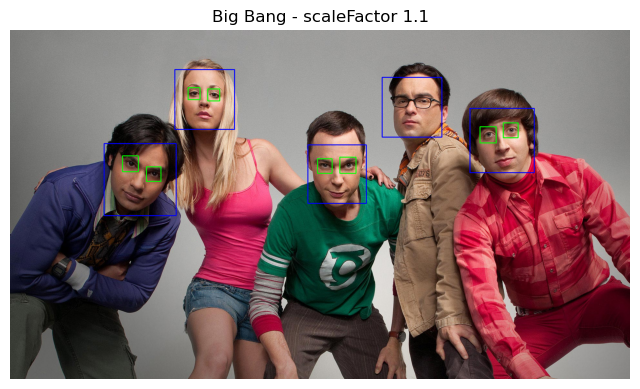

Imagen guardada en: harr/big_bang_1.png


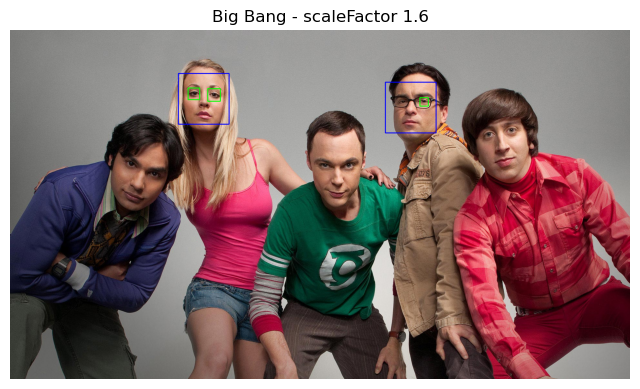

Imagen guardada en: harr/big_bang_2.png


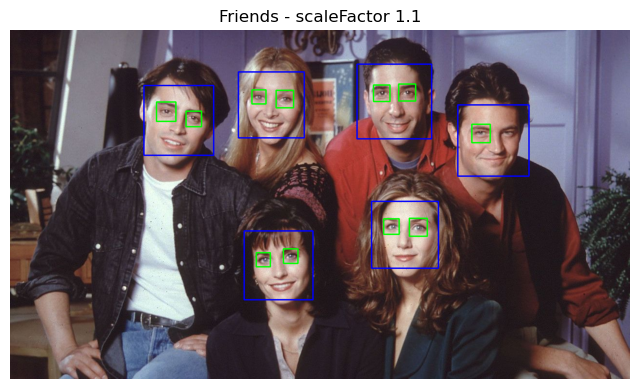

Imagen guardada en: harr/friends_1.png


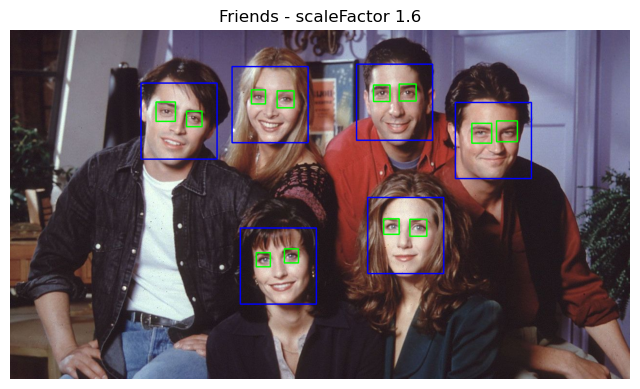

Imagen guardada en: harr/friends_2.png


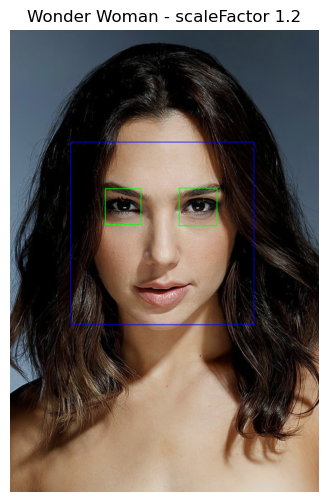

Imagen guardada en: harr/wonder_1.png


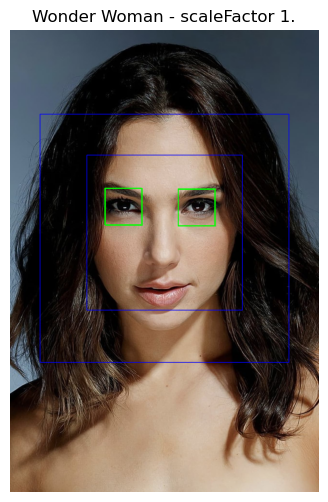

Imagen guardada en: harr/wonder_2.png


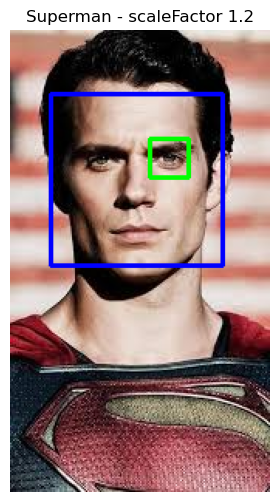

Imagen guardada en: harr/superman_1.png


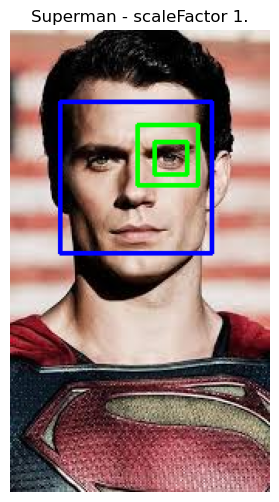

Imagen guardada en: harr/superman_2.png


In [1]:
import sys
sys.path.insert(0, '../')

import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Definición de la clase para detectar rostros y ojos usando clasificadores Haar.
class FaceDetector:
    """
    Clase para la detección de rostros y ojos usando clasificadores Haar.
    """
    def __init__(self, face_cascade_path, eye_cascade_path):
        """
        Inicializa los clasificadores Haar para rostros y ojos.
        
        :param face_cascade_path: Ruta al archivo XML para detección de rostros.
        :param eye_cascade_path: Ruta al archivo XML para detección de ojos.
        """
        self.face_cascade = cv2.CascadeClassifier(face_cascade_path)
        self.eye_cascade = cv2.CascadeClassifier(eye_cascade_path)
        
        # Verificar que los clasificadores se hayan cargado correctamente.
        if self.face_cascade.empty():
            raise IOError("Error al cargar el clasificador de rostros")
        if self.eye_cascade.empty():
            raise IOError("Error al cargar el clasificador de ojos")

    def detect_and_draw(self, img, scaleFactor=1.1, minNeighbors=5):
        """
        Detecta rostros y ojos en la imagen y dibuja los rectángulos correspondientes.
        
        :param img: Imagen en la que se realizará la detección (en formato BGR).
        :param scaleFactor: Factor de escala usado en detectMultiScale.
        :param minNeighbors: Número de vecinos que cada candidato a detección debe tener.
        :return: Imagen con los rostros y ojos detectados marcados.
        """
        # Convertir la imagen a escala de grises.
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Detectar rostros.
        faces = self.face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
        for (x, y, w, h) in faces:
            # Dibujar un rectángulo alrededor del rostro.
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # Región de interés para detectar ojos.
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]
            # Detectar ojos dentro de la región de interés.
            eyes = self.eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        return img


def mostrar_y_guardar(imagen, titulo, ruta_guardado):
    """
    Muestra la imagen en el notebook utilizando Matplotlib y la guarda en disco.
    
    :param imagen: Imagen en formato BGR.
    :param titulo: Título para la imagen.
    :param ruta_guardado: Ruta donde se guardará la imagen.
    """
    # Convertir la imagen de BGR a RGB para visualizarla correctamente.
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen en el notebook.
    plt.figure(figsize=(8, 6))
    plt.imshow(imagen_rgb)
    plt.title(titulo)
    plt.axis("off")
    plt.show()
    
    # Guardar la imagen en disco (se guarda en formato PNG).
    cv2.imwrite(ruta_guardado, imagen)
    print(f"Imagen guardada en: {ruta_guardado}")


# Rutas a los clasificadores Haar y a las imágenes de ejemplo.
faces_haar = '../data/cascades/haarcascade_frontalface_default.xml'
eyes_haar = '../data/cascades/haarcascade_eye.xml'

big_bang_path = '../data/faces/big_bang.jpeg'                # Imagen con varias personas (a mayor distancia)
friends_path = '../data/faces/friends.jpg'                   # Imagen con varias personas (a mayor distancia)
wonder_woman_path   = '../data/faces/wonder_woman.jpg'       # Imagen con rostro cercano (foto carnet)
superman_path   = '../data/faces/superman.jpeg'              # Imagen con rostro cercano (foto carnet)

# Cargar imágenes utilizando imageio (también podrías usar cv2.imread).
big_bang = imageio.v2.imread(big_bang_path)
friends = imageio.v2.imread(friends_path)

wonder_woman   = imageio.v2.imread(wonder_woman_path)
superman   = imageio.v2.imread(superman_path)



# Convertir las imágenes a formato BGR si es necesario.
# Nota: imageio lee las imágenes en RGB, pero para la detección con OpenCV se espera BGR.
big_bang_bgr = cv2.cvtColor(big_bang, cv2.COLOR_RGB2BGR)
friends_bgr = cv2.cvtColor(friends, cv2.COLOR_RGB2BGR)

wonder_woman_bgr   = cv2.cvtColor(wonder_woman, cv2.COLOR_RGB2BGR)
superman_bgr   = cv2.cvtColor(superman, cv2.COLOR_RGB2BGR)

# Crear el detector de rostros.
detector = FaceDetector(faces_haar, eyes_haar)

# Realizar la detección y dibujar los rectángulos.
# En este ejemplo, aplicamos diferentes valores de scaleFactor para la imagen con varias personas.
resultado_big_bang_1 = detector.detect_and_draw(big_bang_bgr.copy(), scaleFactor=1.1)
resultado_big_bang_2 = detector.detect_and_draw(big_bang_bgr.copy(), scaleFactor=1.6)

resultado_friends_1 = detector.detect_and_draw(friends_bgr.copy(), scaleFactor=1.1)
resultado_friends_2 = detector.detect_and_draw(friends_bgr.copy(), scaleFactor=1.6)


resultado_wonder_woman_1 = detector.detect_and_draw(wonder_woman_bgr.copy(), scaleFactor=1.2)
resultado_wonder_woman_2 = detector.detect_and_draw(wonder_woman_bgr.copy(), scaleFactor=1.6)

resultado_superman_1 = detector.detect_and_draw(superman_bgr.copy(), scaleFactor=1.2)
resultado_superman_2 = detector.detect_and_draw(superman_bgr.copy(), scaleFactor=1.6)


# Mostrar y guardar las imágenes resultantes.
mostrar_y_guardar(resultado_big_bang_1, "Big Bang - scaleFactor 1.1", "harr/big_bang_1.png")
mostrar_y_guardar(resultado_big_bang_2, "Big Bang - scaleFactor 1.6", "harr/big_bang_2.png")

mostrar_y_guardar(resultado_friends_1, "Friends - scaleFactor 1.1", "harr/friends_1.png")
mostrar_y_guardar(resultado_friends_2, "Friends - scaleFactor 1.6", "harr/friends_2.png")

mostrar_y_guardar(resultado_wonder_woman_1, "Wonder Woman - scaleFactor 1.2", "harr/wonder_1.png")
mostrar_y_guardar(resultado_wonder_woman_2, "Wonder Woman - scaleFactor 1.", "harr/wonder_2.png")

mostrar_y_guardar(resultado_superman_1, "Superman - scaleFactor 1.2", "harr/superman_1.png")
mostrar_y_guardar(resultado_superman_2, "Superman - scaleFactor 1.", "harr/superman_2.png")


Clasificador cargado desde: ../data/cascades/haarcascade_frontalface_default.xml


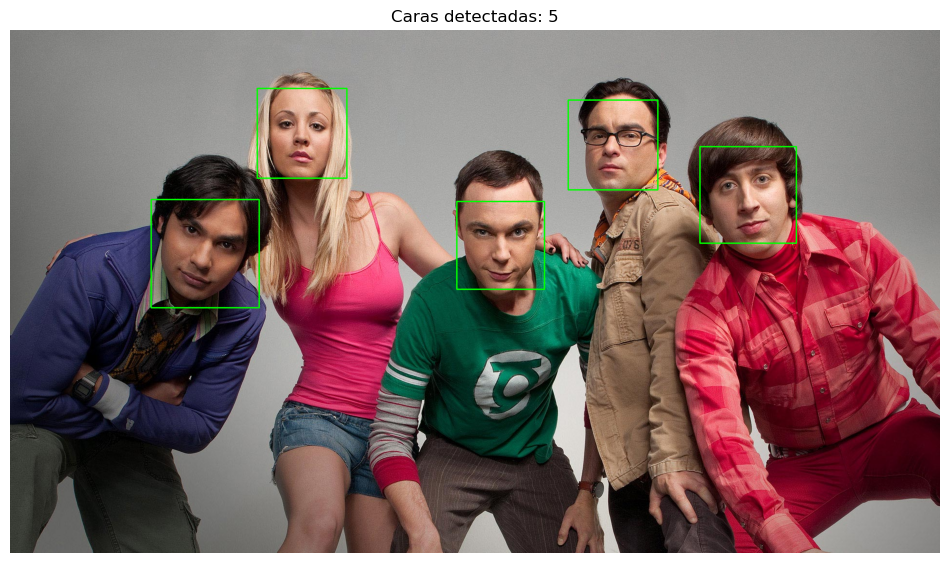

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

class HaarFaceDetector:
    def __init__(self):
        # Intentamos diferentes rutas comunes para el clasificador
        cascade_paths = [
                # Rutas a los clasificadores Haar y a las imágenes de ejemplo.
                '../data/cascades/haarcascade_frontalface_default.xml',
                '../data/cascades/haarcascade_eye.xml'
        ]
        
        # Intentamos cargar el clasificador desde las rutas disponibles
        self.face_cascade = None
        for path in cascade_paths:
            if os.path.exists(path):
                self.face_cascade = cv2.CascadeClassifier(path)
                print(f"Clasificador cargado desde: {path}")
                break
                
        if self.face_cascade is None:
            print("ADVERTENCIA: No se encontró el archivo del clasificador")
            print("Por favor, descargue haarcascade_frontalface_default.xml de:")
            print("https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml")
            print("Y colóquelo en el directorio del proyecto")
            raise FileNotFoundError("No se encontró el archivo del clasificador Haar")
        
    def detect_faces(self, image):
        """
        Detecta caras en una imagen usando el clasificador Haar en cascada.
        
        Args:
            image: Imagen de entrada (BGR o grayscale)
            
        Returns:
            faces: Lista de rectángulos (x, y, w, h) que contienen las caras detectadas
            image_with_faces: Imagen original con rectángulos dibujados alrededor de las caras
        """
        # Convertimos a escala de grises si la imagen está en color
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image
            
        # Detectamos las caras
        faces = self.face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )
        
        # Creamos una copia de la imagen para dibujar
        image_with_faces = image.copy()
        
        # Dibujamos un rectángulo alrededor de cada cara detectada
        for (x, y, w, h) in faces:
            cv2.rectangle(
                image_with_faces, 
                (x, y), 
                (x + w, y + h),
                (0, 255, 0),
                2
            )
            
        return faces, image_with_faces
    
    def process_image(self, image_path):
        """
        Procesa una imagen desde archivo y detecta caras.
        
        Args:
            image_path: Ruta al archivo de imagen
            
        Returns:
            faces: Lista de rectángulos con las caras detectadas
            result_image: Imagen con las caras marcadas
        """
        # Leemos la imagen
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"No se pudo cargar la imagen: {image_path}")
            
        return self.detect_faces(image)
    
    def visualize_results(self, image_path):
        """
        Visualiza los resultados de la detección usando matplotlib.
        
        Args:
            image_path: Ruta al archivo de imagen
        """
        # Detectamos las caras
        faces, result = self.process_image(image_path)
        
        # Convertimos de BGR a RGB para matplotlib
        result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
        
        # Configuramos la visualización
        plt.figure(figsize=(12, 8))
        plt.imshow(result_rgb)
        plt.title(f'Caras detectadas: {len(faces)}')
        plt.axis('off')
        plt.show()



# Ejemplo de uso
if __name__ == "__main__":
    detector = HaarFaceDetector()
    
    # Ejemplo con una imagen de prueba
    try:
        detector.visualize_results("../data/faces/big_bang.jpeg")
    except Exception as e:
        print(f"Error al procesar la imagen: {str(e)}")